In [234]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [132]:
# abvi
abvi = pd.read_csv('Arab_Barometer_Wave_6_Part_1_ENG_RELEASE.csv')
abvi_final = abvi[['Q601_4','COUNTRY']]
abvi_final = abvi_final.rename({'Q601_4':'data', 'COUNTRY':'country'},axis='columns')
# abvi_final = abvi_final.drop(abvi_final[abvi_final.data >5].index)
abvi_final['Period'] = '2020-2021'


# abv
abv = pd.read_csv('ABV_Release_Data.csv')
abv_final = abv[['Q601_4','country']]
abv_final = abv_final.rename({'Q601_4':'data'},axis='columns')
# abv_final = abv_final.drop(abv_final[abv_final.data >5].index)
abv_final['Period']='2018-2019'


# abiv
abiv = pd.read_csv("ABIV_English.csv")
abiv_final = abiv[['q6014','country']]
abiv_final = abiv_final.rename({'q6014':'data'},axis='columns')

abiv_final.loc[abiv_final['data'].str.contains('strongly agree'),'data']=1
abiv_final['data']=abiv_final.data.replace(r'I agree','2')
abiv_final['data']=abiv_final.data.replace(r'I disagree','3')
abiv_final['data']=abiv_final.data.replace(r'I strongly disagree','4')
abiv_final['Period'] = '2016-2017'


# abiii
abiii = pd.read_csv('ABIII_English.csv')
abiii_final = abiii[['q6014','country']]
abiii_final = abiii_final.rename({'q6014':'data'},axis='columns')

abiii_final['data']=abiii_final.data.replace(r'I strongly agree','1')
abiii_final['data']=abiii_final.data.replace(r'I somewhat agree','2')
abiii_final['data']=abiii_final.data.replace(r'I somewhat disagree','3')
abiii_final['data']=abiii_final.data.replace(r'I strongly disagree','4')
abiii_final['Period'] = '2012-2014'



# abii
abii = pd.read_csv('ABII_English.csv')
abii_final = abii[['q60104','country']]
abii_final = abii_final.rename({'q60104':'data'},axis='columns')


abii_final['data']=abii_final.data.replace(r'1. i strongly agree','1')
abii_final['data']=abii_final.data.replace(r'2. i agree','2')
abii_final['data']=abii_final.data.replace(r'3. i disagree','3')
abii_final['data']=abii_final.data.replace(r'4. i strongly disagree','4')
abii_final['country'] = abii_final['country'].apply(lambda x: x.split('. ')[1])

abii_final['Period'] = '2010-2011'



# abi
abi = pd.read_csv('ABI_English.csv')
abi_final = abi[['q5054','country']]
abi_final = abi_final.rename({'q5054':'data'},axis='columns')


abi_final['data']=abi_final.data.replace(r'agree','2')
abi_final['data']=abi_final.data.replace(r'strongly agree','1')
abi_final['data']=abi_final.data.replace(r'disagree','3')
abi_final['data']=abi_final.data.replace(r'strongly disagree','4')
abi_final['Period'] = '2006-2007'

final_df1 = pd.concat([abi_final,abii_final, abiii_final, abiv_final, abv_final, abvi_final])


/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20531/3887906492.py:21: DtypeWarning: Columns (2,6,39,41,44,45,46,47,97,99,101,103,169,172,179,197,198,199,200,213,223,229,231,232,235,237,238,241,245,249,252,260,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,287,289) have mixed types. Specify dtype option on import or set low_memory=False.
  abiv = pd.read_csv("ABIV_English.csv")
/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20531/3887906492.py:33: DtypeWarning: Columns (7,10,31,32,33,34,35,36,43,44,49,50,51,52,70,71,96,99,188,189,190,191,192,193,194,195,196,203,204,205,206,207,208,209,210,211,230,231,240,241,242,243,244,245,246,247,248,265,266,268,269,270,283,291,292,293,294,295) have mixed types. Specify dtype option on import or set low_memory=False.
  abiii = pd.read_csv('ABIII_English.csv')
/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20531/3887906492.py:46: DtypeWarning: Columns (2,3,6,13,18,23,24,25,26,27,

checkpoint just in case

In [225]:
final_df = final_df1.copy()

cleaning up the missing responses

In [227]:
# fill NA to  a string to show the distribution
final_df['data'] = final_df['data'].fillna('NA')
final_df['data'].value_counts()

4                                  17336
3                                  16009
4.0                                13940
3.0                                12116
2                                   6051
2.0                                 4222
1                                   3353
1                                   2420
98.0                                 300
Don't know                           181
8. i don't know                      138
can't choose/don't know              123
Don't know (Do not read)              46
decline to answer                     45
Refuse                                43
9. declined to answer                 39
NA                                    28
99.0                                  24
0. missing                            12
Decline to answer (Do not read)        6
not clear                              4
Missing                                1
Name: data, dtype: int64

In [318]:
final_df1['Period'].value_counts()

2018-2019    26780
2012-2014    14809
2010-2011    12782
2016-2017     9000
2006-2007     7337
2020-2021     5729
Name: Period, dtype: int64

In [228]:
# getting rid of the string
final_df['data'] = pd.to_numeric(final_df['data'], errors='coerce')

# filtering data above 5, i.e no response, recasting to int, and distribution
final_df = final_df[final_df['data'] < 5]
final_df['data'] = final_df['data'].astype(int)
final_df['data'].value_counts()

/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20531/3656909959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['data'] = final_df['data'].astype(int)


4    31276
3    28125
2    10273
1     5773
Name: data, dtype: int64

recoding the country

In [229]:
country_dict = {1: 'Algeria',
                5: 'Egypt',
                7: 'Iraq',
                8: 'Jordan',
                9: 'Kuwait',
                10: 'Lebanon',
                11: 'Libya',
                13: 'Morocco',
                15: 'Palestine',
                19: 'Sudan',
                21: 'Tunisia',
                22: 'Yemen'}

final_df['country'] = final_df['country'].apply(lambda x: country_dict[x] if isinstance(x, int) else x.lower())
final_df['country'] = final_df['country'].apply(lambda x: x.title() if isinstance(x, str) else x)
final_df['country'].value_counts()

/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20531/2033700942.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['country'] = final_df['country'].apply(lambda x: country_dict[x] if isinstance(x, int) else x.lower())
/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20531/2033700942.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['country'] = final_df['country'].apply(lambda x: x.title() if isinstance(x, str) else x)


Jordan          8975
Lebanon         8641
Algeria         8047
Palestine       7335
Tunisia         6900
Morocco         6823
Egypt           5956
Yemen           5426
Iraq            4848
Sudan           4454
Libya           3881
Kuwait          2383
Saudi Arabia    1361
Bahrain          417
Name: country, dtype: int64

getting the frequency of country appearance in each period

In [230]:
agg_dict = {'Period': 'nunique', 'data': 'sum'}
grouped_data = final_df.groupby('country').agg(agg_dict)
grouped_data['data'] = grouped_data['data'].astype(int)
# grouped_data = grouped_data[grouped_data["Period"] < 3]
grouped_data.sort_values(by='Period')

,Period,data
country,,
Bahrain,1,1332
Saudi Arabia,1,4163
Kuwait,2,7404
Iraq,3,15030
Libya,3,12003
Sudan,3,12749
Egypt,4,18409
Yemen,4,15249
Morocco,5,21520


In [236]:
# Count the number of unique dates that each country appears in
country_date_counts = final_df.groupby('country')['Period'].nunique()

# Filter the DataFrame to include only the countries that appear in three or more unique dates
included_countries = country_date_counts[country_date_counts >= 3].index
filtered_df = final_df[final_df['country'].isin(included_countries)]
filtered_df['country'].value_counts()

Jordan       8975
Lebanon      8641
Algeria      8047
Palestine    7335
Tunisia      6900
Morocco      6823
Egypt        5956
Yemen        5426
Iraq         4848
Sudan        4454
Libya        3881
Name: country, dtype: int64

In [277]:
means = filtered_df.groupby(['country', 'Period'])['data'].mean()
means = pd.DataFrame(means)
means=means.round(2).unstack(level=1)
means

data                                                  
Period    2006-2007 2010-2011 2012-2014 2016-2017 2018-2019 2020-2021
country                                                              
Algeria        3.09      3.05      3.52      3.08      3.06      3.26
Egypt           NaN      2.91      3.13      3.33      3.04       NaN
Iraq            NaN      2.99      2.97       NaN      3.22       NaN
Jordan         2.71      2.84      3.08      3.19      3.30      3.36
Lebanon        3.45      3.37      3.52      3.31      3.41      3.54
Libya           NaN       NaN      3.07       NaN      3.09      3.13
Morocco        2.91       NaN      2.92      3.34      3.26      3.24
Palestine      2.92      3.09      3.06      3.16      3.22       NaN
Sudan           NaN      2.74      2.90       NaN      2.94       NaN
Tunisia         NaN      2.94      3.34      3.56      3.03      3.41
Yemen          2.63      2.79      2.75       NaN      2.90       NaN

In [285]:
pct_change_by_period = means.pct_change(axis=1)
pct_change_by_period= pd.DataFrame((pct_change_by_period['data']*100).round(2))
pct_change_by_period = pct_change_by_period.rename(columns={'data':'PoP Percentage Change'})
pct_change_by_period['Average'] = pct_change_by_period.apply(lambda row: row[(row.notna()) & (row != 0)].mean(), axis=1).round(2)
pct_change_by_period.replace(0, np.nan)


Period,2006-2007,2010-2011,2012-2014,2016-2017,2018-2019,2020-2021,Average
country,,,,,,,
Algeria,NaN,-1.29,15.41,-12.50,-0.65,6.54,1.50
Egypt,NaN,NaN,7.56,6.39,-8.71,NaN,1.75
Iraq,NaN,NaN,-0.67,NaN,8.42,NaN,3.88
Jordan,NaN,4.80,8.45,3.57,3.45,1.82,4.42
Lebanon,NaN,-2.32,4.45,-5.97,3.02,3.81,0.60
Libya,NaN,NaN,NaN,NaN,0.65,1.29,0.97
Morocco,NaN,NaN,0.34,14.38,-2.40,-0.61,2.93
Palestine,NaN,5.82,-0.97,3.27,1.90,NaN,2.51
Sudan,NaN,NaN,5.84,NaN,1.38,NaN,3.61


In [288]:
means_pct_change_from_first_period = means.copy()
def percentage_change(row):
    first_period = row.dropna().iloc[0]
    last_period = row.dropna().iloc[-1]
    return ((last_period - first_period) / first_period * 100).round(2)
means_pct_change_from_first_period['Percentage Change from First Period'] = means_pct_change_from_first_period.apply(percentage_change, axis=1)
means_pct_change_from_first_period

data                                                    \
Period    2006-2007 2010-2011 2012-2014 2016-2017 2018-2019 2020-2021   
country                                                                 
Algeria        3.09      3.05      3.52      3.08      3.06      3.26   
Egypt           NaN      2.91      3.13      3.33      3.04       NaN   
Iraq            NaN      2.99      2.97       NaN      3.22       NaN   
Jordan         2.71      2.84      3.08      3.19      3.30      3.36   
Lebanon        3.45      3.37      3.52      3.31      3.41      3.54   
Libya           NaN       NaN      3.07       NaN      3.09      3.13   
Morocco        2.91       NaN      2.92      3.34      3.26      3.24   
Palestine      2.92      3.09      3.06      3.16      3.22       NaN   
Sudan           NaN      2.74      2.90       NaN      2.94       NaN   
Tunisia         NaN      2.94      3.34      3.56      3.03      3.41   
Yemen          2.63      2.79      2.75       NaN      2.90       NaN   

          Percentage Change from First Period  
Period                                         
country                                        
Algeria                                  5.50  
Egypt                                    4.47  
Iraq                                     7.69  
Jordan                                  23.99  
Lebanon                                  2.61  
Libya                                    1.95  
Morocco                                 11.34  
Palestine                               10.27  
Sudan                                    7.30  
Tunisia                                 15.99  
Yemen                                   10.27

In [253]:
means_top5 = means.max(axis=1).nlargest(5)
means_top5

country
Tunisia    3.56
Lebanon    3.54
Algeria    3.52
Jordan     3.36
Morocco    3.34
dtype: float64

In [287]:
pct_change_by_period_top5 = pct_change_by_period.max(axis=1).nlargest(5)
pct_change_by_period_top5

country
Algeria    15.41
Morocco    14.38
Tunisia    13.61
Jordan      8.45
Iraq        8.42
dtype: float64

In [289]:
means_pct_change_from_first_period['Percentage Change from First Period'].mean()

9.216363636363635

In [295]:
# Compute the mean and standard error of the mean for each country and time period
means = filtered_df.groupby(['Period', 'country'])['data'].mean()
n = filtered_df.groupby(['Period', 'country'])['data'].count()
se = filtered_df.groupby(['Period', 'country'])['data'].std() / np.sqrt(n)
filtered_df['Country'] = filtered_df['country'].str.title()

# Calculate the t-value for a 95% confidence interval with n-1 degrees of freedom
t_value = stats.t.ppf(0.975, n-1)

# Calculate the confidence interval for each country and time period
ci = t_value * se


# Compute the upper and lower bounds for each country and time period
bounds = pd.concat([means - ci, means + ci], axis=1, keys=['Lower Bound', 'Upper Bound'])

# Reshape the DataFrame to have separate columns for the upper and lower bounds
bounds = bounds.stack().unstack(level=1)

# Rename the index levels to 'Confidence Intervals' and 'Date'
bounds.index.names = ['Period', 'Confidence Intervals']

# Sort the index by country and date
bounds = bounds.sort_index()
bounds = bounds.round(3)

bounds.T


/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20531/838921662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Country'] = filtered_df['country'].str.title()


Period                 2006-2007               2010-2011              \
Confidence Intervals Lower Bound Upper Bound Lower Bound Upper Bound   
country                                                                
Algeria                    3.035       3.139       2.999       3.094   
Egypt                        NaN         NaN       2.855       2.970   
Iraq                         NaN         NaN       2.941       3.036   
Jordan                     2.659       2.771       2.783       2.898   
Lebanon                    3.406       3.497       3.314       3.424   
Libya                        NaN         NaN         NaN         NaN   
Morocco                    2.856       2.955         NaN         NaN   
Palestine                  2.872       2.973       3.044       3.138   
Sudan                        NaN         NaN       2.690       2.800   
Tunisia                      NaN         NaN       2.891       2.996   
Yemen                      2.561       2.701       2.738       2.851   

Period                 2012-2014               2016-2017              \
Confidence Intervals Lower Bound Upper Bound Lower Bound Upper Bound   
country                                                                
Algeria                    3.487       3.557       3.031       3.137   
Egypt                      3.073       3.184       3.282       3.382   
Iraq                       2.920       3.016         NaN         NaN   
Jordan                     3.035       3.124       3.140       3.234   
Lebanon                    3.469       3.572       3.272       3.349   
Libya                      3.015       3.127         NaN         NaN   
Morocco                    2.863       2.979       3.295       3.381   
Palestine                  3.015       3.112       3.111       3.209   
Sudan                      2.838       2.955         NaN         NaN   
Tunisia                    3.290       3.395       3.513       3.608   
Yemen                      2.694       2.809         NaN         NaN   

Period                 2018-2019               2020-2021              
Confidence Intervals Lower Bound Upper Bound Lower Bound Upper Bound  
country                                                               
Algeria                    3.026       3.093       3.203       3.309  
Egypt                      3.005       3.080         NaN         NaN  
Iraq                       3.180       3.260         NaN         NaN  
Jordan                     3.270       3.340       3.304       3.415  
Lebanon                    3.384       3.441       3.498       3.582  
Libya                      3.061       3.124       3.065       3.197  
Morocco                    3.230       3.298       3.182       3.295  
Palestine                  3.188       3.245         NaN         NaN  
Sudan                      2.896       2.987         NaN         NaN  
Tunisia                    3.000       3.067       3.359       3.464  
Yemen                      2.858       2.941         NaN         NaN

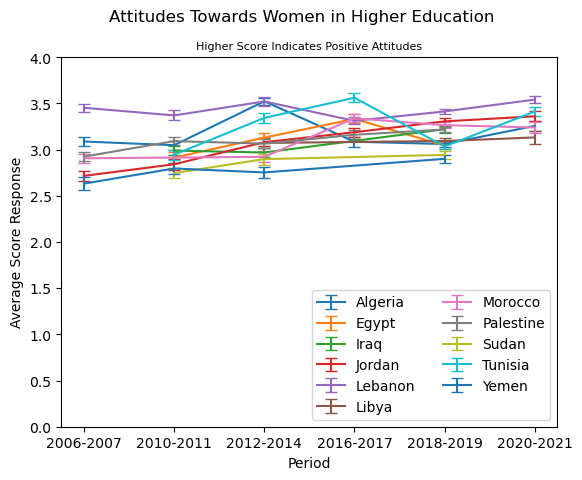

In [313]:

# Plot the data for each country as a separate line with error bars representing the confidence interval
fig, ax = plt.subplots()
for country in included_countries:
    x = means.loc[pd.IndexSlice[:, country]].index.get_level_values(0)
    y = means.loc[pd.IndexSlice[:, country]]
    err = ci.loc[pd.IndexSlice[:, country]]
    ax.errorbar(x, y, yerr=err, label=country, capsize=4)

# Set the title and axis labels
plt.title('Higher Score Indicates Positive Attitudes',fontsize=8)
plt.suptitle('Attitudes Towards Women in Higher Education')
ax.set_xlabel('Period')
ax.set_ylabel('Average Score Response')
ax.set_ylim(0,4)
ax.legend(loc='lower right', ncol=4)

handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
    labels[i] = label.title()
ax.legend(handles, labels, loc='lower right', ncol=2)

plt.show()

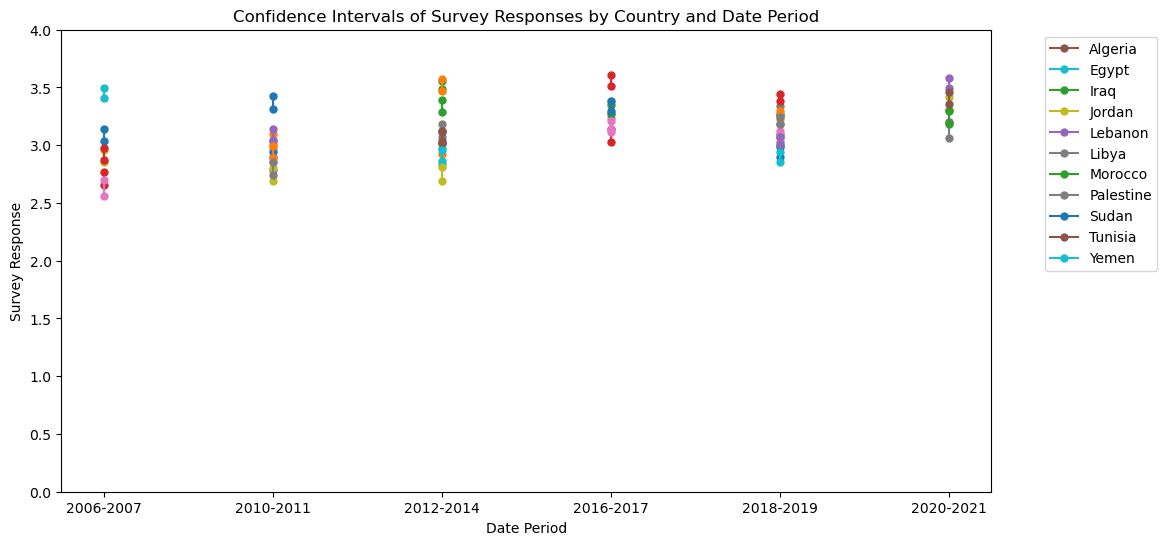

In [314]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Assuming the given DataFrame is named `bounds`
countries = bounds.columns
date_periods = bounds.index.levels[0].tolist()

# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through countries and date_periods to plot confidence intervals
for idx, country in enumerate(countries):
    for period_idx, date_period in enumerate(date_periods):
        lower_bound = bounds.loc[(date_period, 'Lower Bound'), country]
        upper_bound = bounds.loc[(date_period, 'Upper Bound'), country]

        if not (np.isnan(lower_bound) or np.isnan(upper_bound)):
            plt.plot([period_idx] * 2, [lower_bound, upper_bound], marker='o', linestyle='-', linewidth=1.5, markersize=5, label=country)

# Set the x-axis labels
plt.xticks(range(len(date_periods)), date_periods)

# Add title and labels
plt.title("Confidence Intervals of Survey Responses by Country and Date Period")
plt.xlabel("Date Period")
plt.ylabel("Survey Response")
plt.ylim(0,4)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()


country,Algeria,Egypt,Iraq,Jordan,Lebanon,Libya,Morocco,Palestine,Sudan,Tunisia,Yemen
Period,,,,,,,,,,,
2006-2007,0.104,NaN,NaN,0.112,0.091,NaN,0.099,0.101,NaN,NaN,0.140
2010-2011,0.095,0.115,0.095,0.115,0.110,NaN,NaN,0.094,0.110,0.105,0.113
2012-2014,0.070,0.111,0.096,0.089,0.103,0.112,0.116,0.097,0.117,0.105,0.115
2016-2017,0.106,0.100,NaN,0.094,0.077,NaN,0.086,0.098,NaN,0.095,NaN
2018-2019,0.067,0.075,0.080,0.070,0.057,0.063,0.068,0.057,0.091,0.067,0.083
2020-2021,0.106,NaN,NaN,0.111,0.084,0.132,0.113,NaN,NaN,0.105,NaN


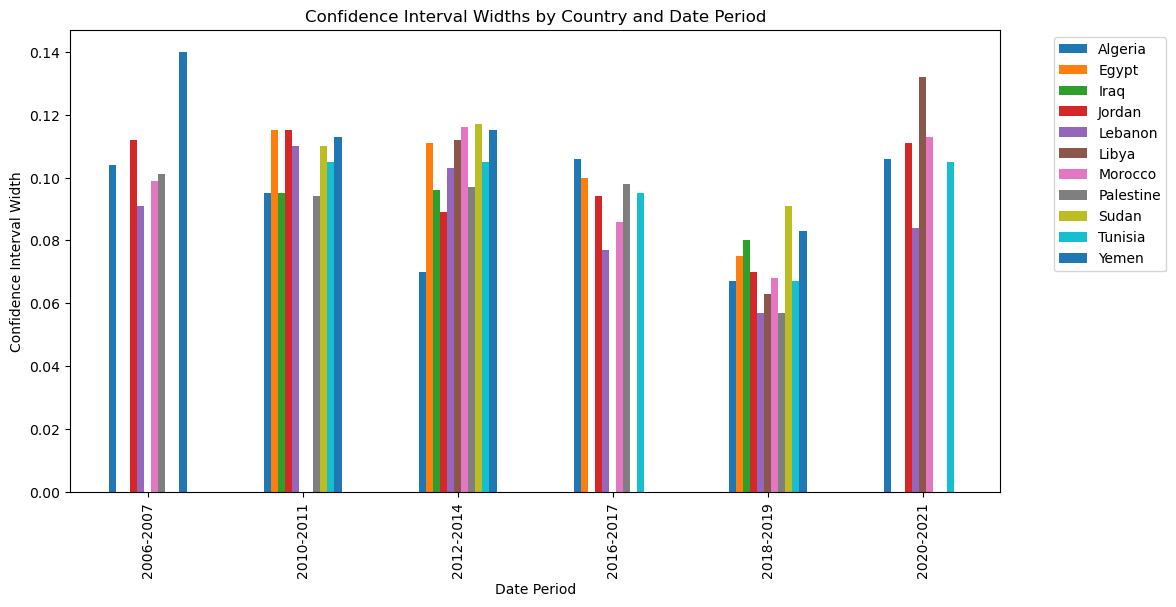

In [315]:
# Get the upper and lower bounds as separate DataFrames
upper_bounds = bounds.xs('Upper Bound', level=1)
lower_bounds = bounds.xs('Lower Bound', level=1)

# Calculate the confidence interval widths
interval_widths = upper_bounds - lower_bounds
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the confidence interval widths as a bar plot
interval_widths.plot(kind='bar', ax=ax)

# Set the x-axis labels
plt.xticks(range(len(date_periods)), date_periods)

# Add title and labels
plt.title("Confidence Interval Widths by Country and Date Period")
plt.xlabel("Date Period")
plt.ylabel("Confidence Interval Width")

# Add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

display(interval_widths)
# Show the plot
plt.show()


In [306]:
average_interval_widths = interval_widths.mean(axis=1, skipna=True)
average_interval_width= pd.DataFrame(average_interval_widths,columns=['Average Interval Widths'])
average_interval_width.reset_index(inplace=True)
display(average_interval_width)

average_interval_widths_by_country = interval_widths.mean(axis=0, skipna=True)
average_interval_width_by_country= pd.DataFrame(average_interval_widths_by_country,columns=['Average Interval Widths'])
average_interval_width_by_country.reset_index(inplace=True)
average_interval_width=average_interval_width.rename(columns={'country':'Country'})
display(average_interval_width_by_country)

,Period,Average Interval Widths
0,2006-2007,0.107833
1,2010-2011,0.103083
2,2012-2014,0.103083
3,2016-2017,0.093714
4,2018-2019,0.071917


,country,Average Interval Widths
0,Algeria,0.083400
1,Egypt,0.099250
2,Iraq,0.090667
3,Jordan,0.090800
4,Kuwait,0.099000
5,Lebanon,0.086200
6,Libya,0.095667
7,Morocco,0.097000
8,Palestine,0.090000
9,Sudan,0.108333


In [307]:
average_interval_width['Average Interval Widths'].mean

0.0959261904761905

In [308]:
average_interval_width_by_country['Average Interval Widths'].mean()

0.09554722222222224